#### Object Localization: Add bounding boxes to the image

In [20]:
train = pd.read_csv('../input/blood-cell-detection-dataset/annotations.csv')

In [21]:
train.head()

,image,xmin,ymin,xmax,ymax,label
0,image-100.png,0.000000,0.000000,25.190198,40.816803,rbc
1,image-100.png,15.010502,0.000000,68.337223,23.527421,rbc
2,image-100.png,25.017503,16.021004,78.374562,73.735123,rbc
3,image-100.png,75.565928,1.061844,140.248541,45.591599,rbc
4,image-100.png,77.483081,23.290548,131.936989,74.806301,rbc


In [22]:
train=train.dropna()

6 columns in the train file.

image: contains the name of the image

label: denotes the type of the cell

xmin: x-coordinate of the bottom left part of the image

xmax: x-coordinate of the top right part of the image

ymin: y-coordinate of the bottom left part of the image

ymax: y-coordinate of the top right part of the image

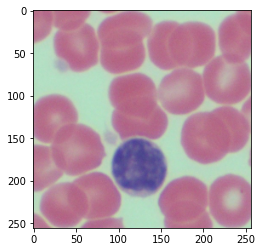

In [23]:
# reading single image using imread function of matplotlib
image = plt.imread('../input/blood-cell-detection-dataset/images/image-100.png')
plt.imshow(image)

In [24]:
train['label'].value_counts()

rbc    2237
wbc     103
Name: label, dtype: int64

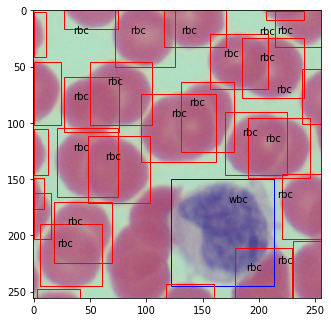

In [25]:
from matplotlib import patches
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('../input/blood-cell-detection-dataset/images/image-14.png')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.image == "image-14.png"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.label == 'rbc':
        edgecolor = 'r'
        ax.annotate('rbc', xy=(xmax-40,ymin+20))
    elif row.label == 'wbc':
        edgecolor = 'b'
        ax.annotate('wbc', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)